## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
from wordcloud import WordCloud
import gc
import re
import string
import operator
from collections import defaultdict
#import tokenization
from wordcloud import STOPWORDS

In [2]:
train = pd.read_csv('train.csv')
test=  pd.read_csv('test.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


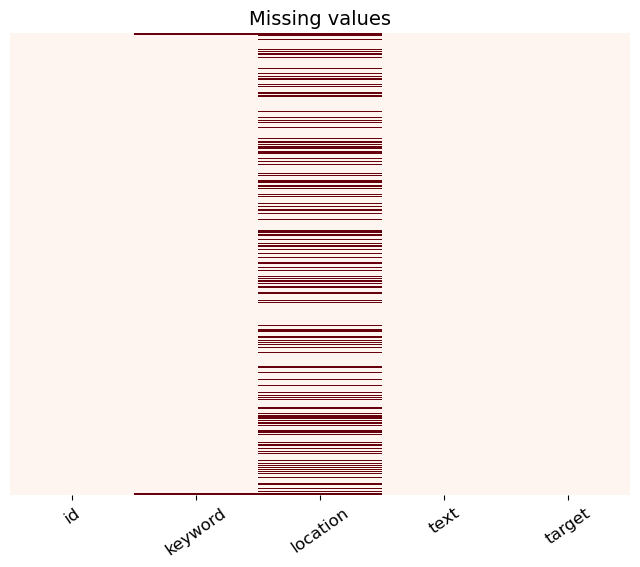

In [4]:
plt.figure(figsize = (8, 6))
sns.heatmap(train.isna(), yticklabels = False, cbar = False, cmap = 'Reds')
plt.title("Missing values", fontsize = 14)
plt.xticks(rotation = 35, fontsize = 12)
plt.show()

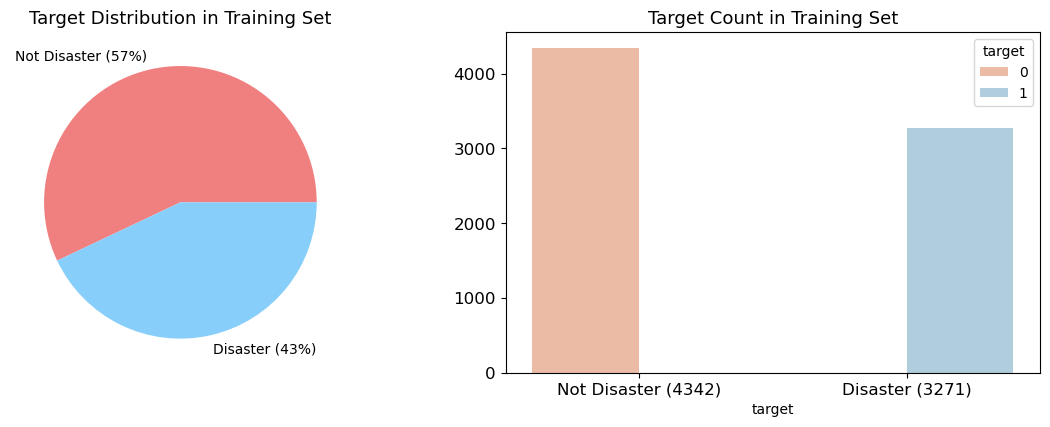

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
plt.tight_layout()

train.groupby('target').count()['id'].plot(kind='pie', ax=axes[0], labels=['Not Disaster (57%)', 'Disaster (43%)'],colors=['lightcoral','lightskyblue'])
sns.countplot(x=train['target'], hue=train['target'], ax=axes[1], palette="RdBu")

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not Disaster (4342)', 'Disaster (3271)'])
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

plt.show()

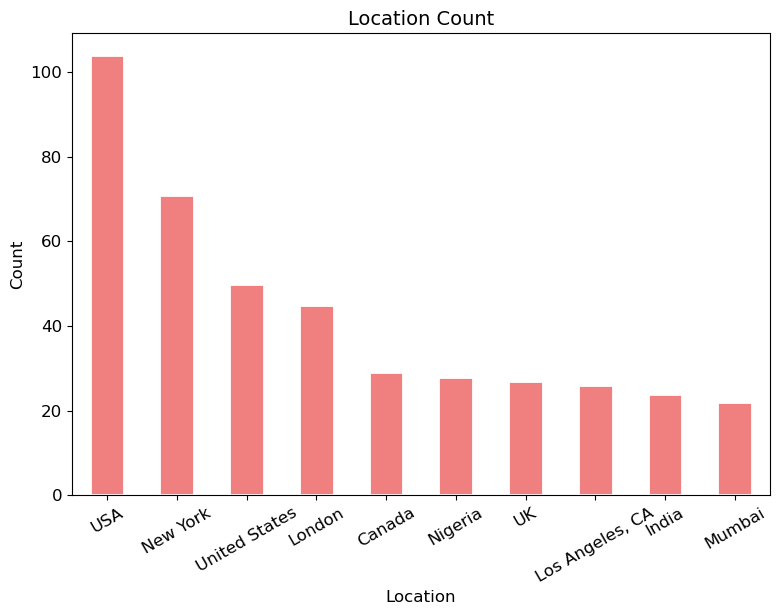

In [6]:
plt.figure(figsize = (9, 6))
ax = plt.axes()
ax.set_facecolor('white')
ax = ((train.location.value_counts())[:10]).plot(kind = 'bar', color = 'lightcoral', linewidth = 2, edgecolor = 'white')
plt.title('Location Count', fontsize = 14)
plt.xlabel('Location', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 12, rotation = 30)
ax.yaxis.set_tick_params(labelsize = 12)

In [7]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 50
DISASTER_TWEETS = train['target'] == 1
# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1

df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1
        
for tweet in train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1
        
df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        disaster_trigrams[word] += 1
        
for tweet in train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1
        
df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])

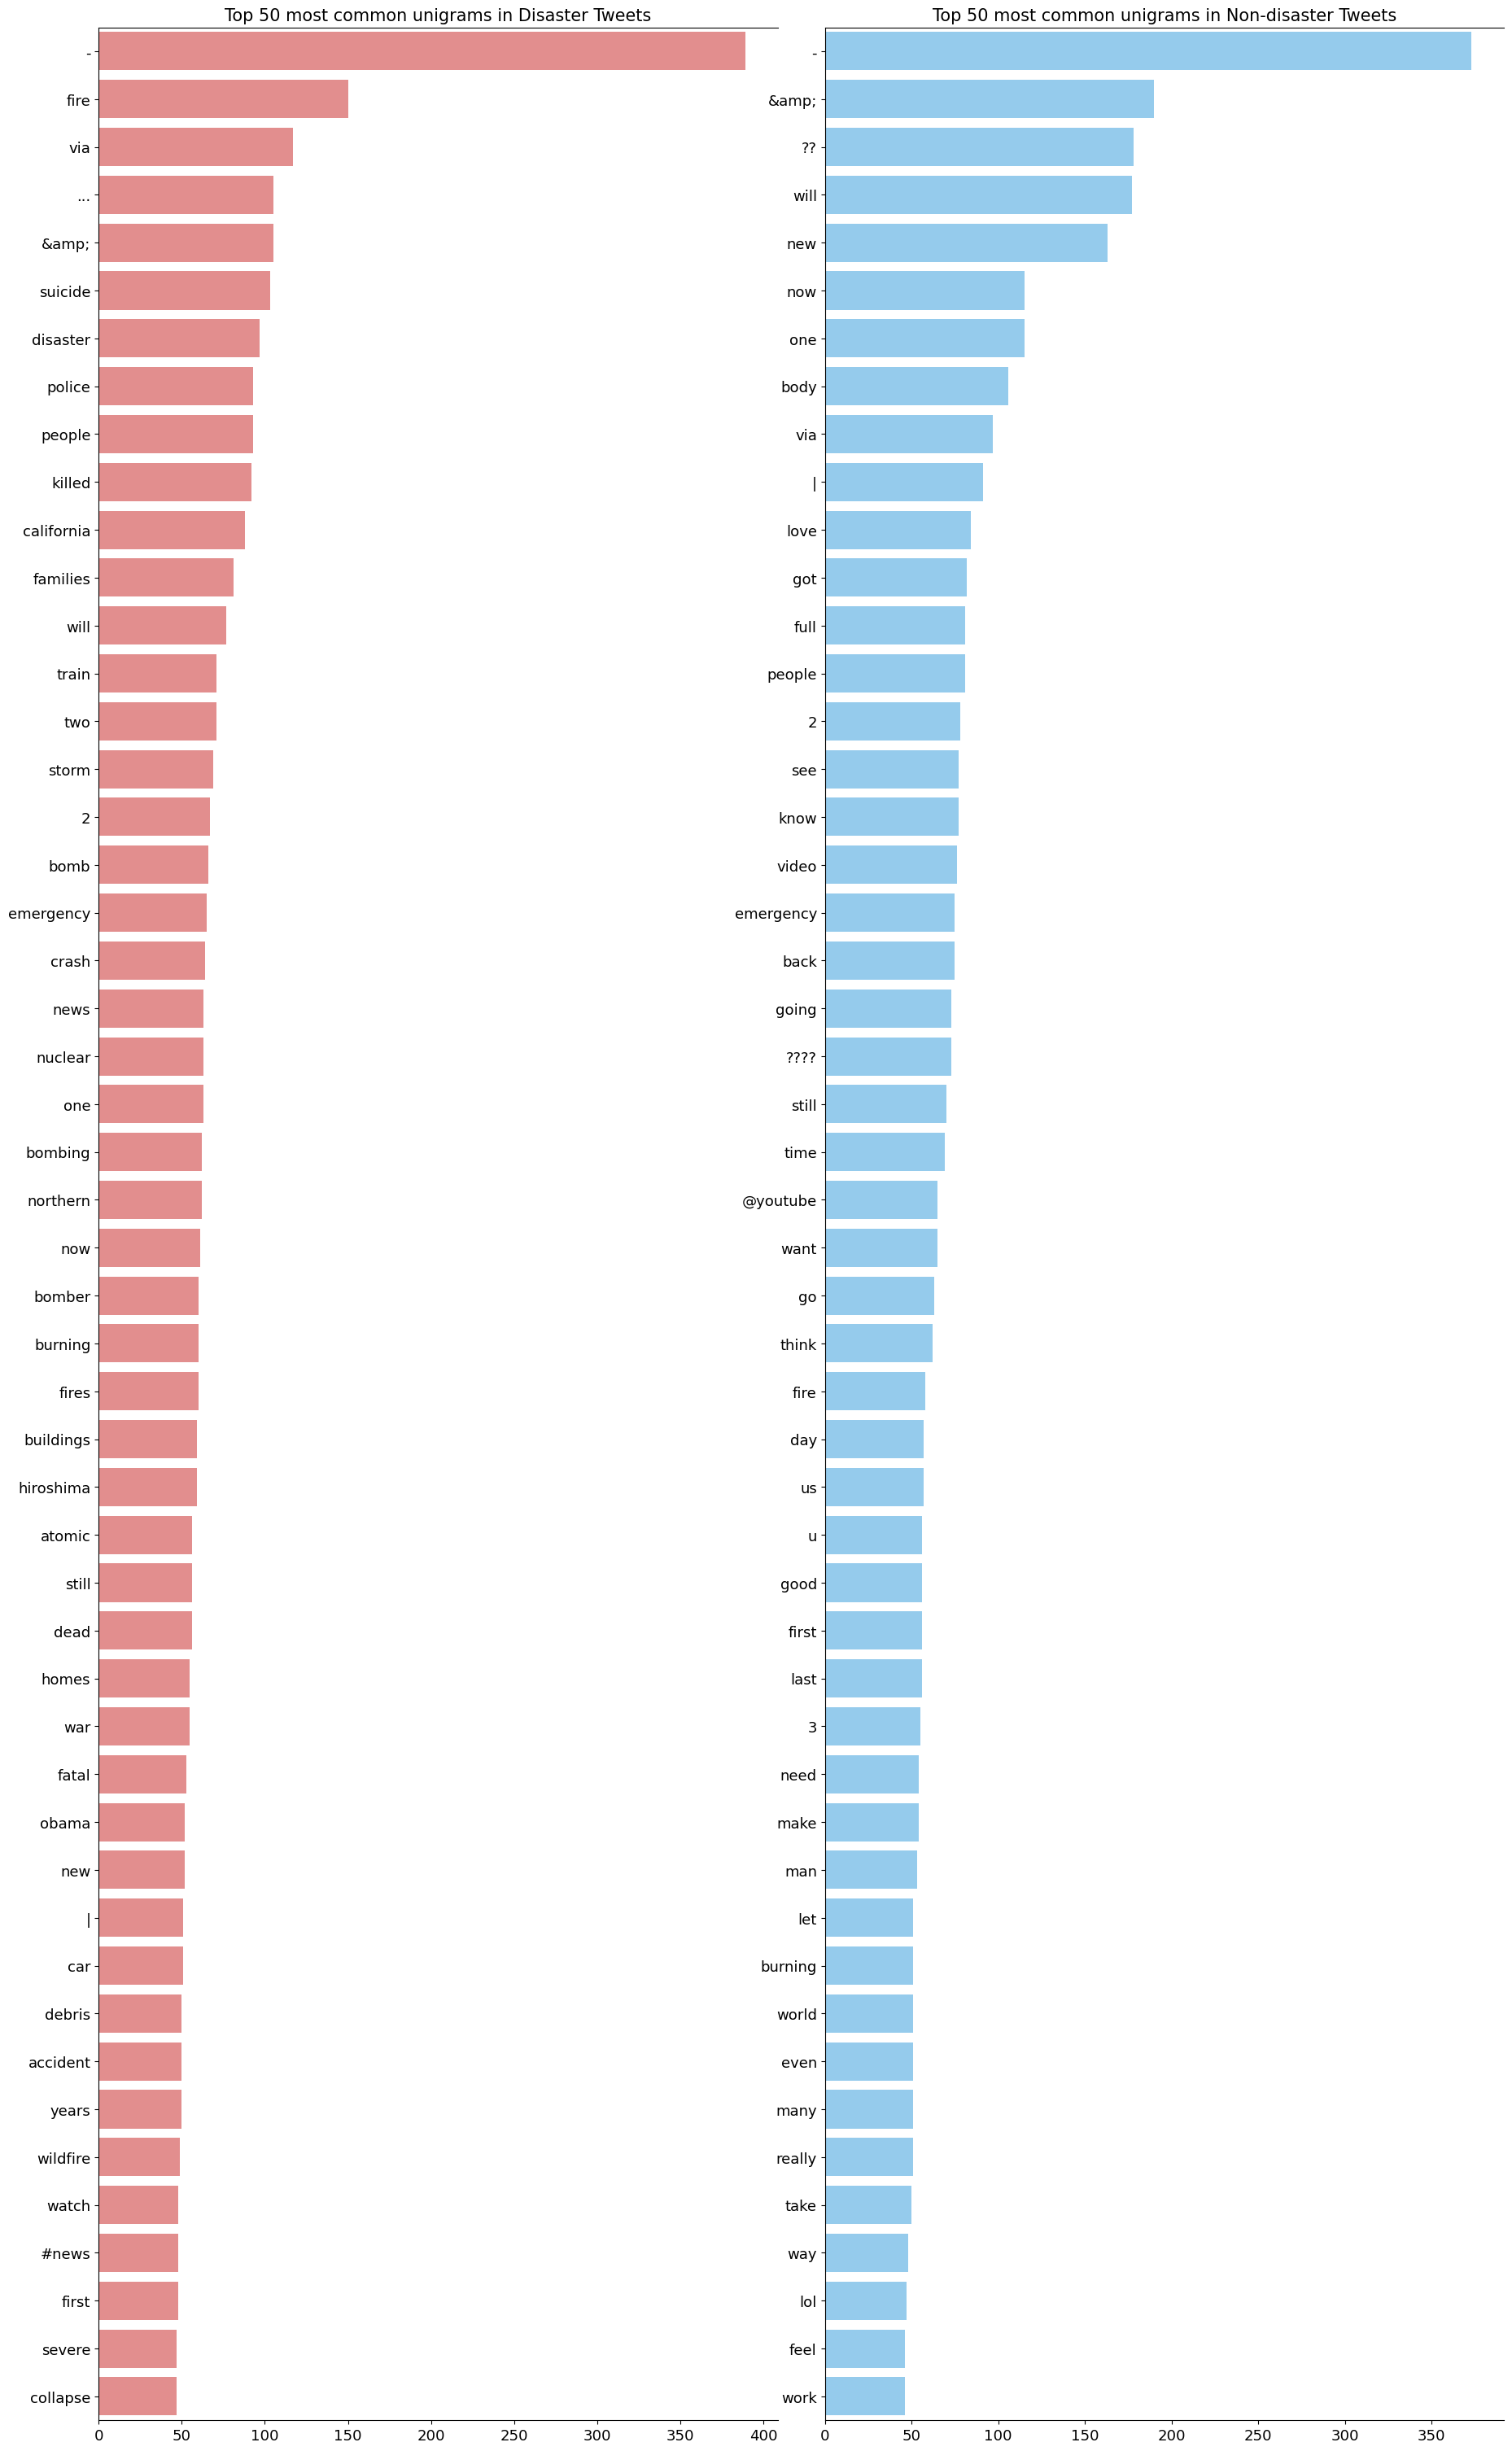

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='lightcoral')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='lightskyblue')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Non-disaster Tweets', fontsize=15)

plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


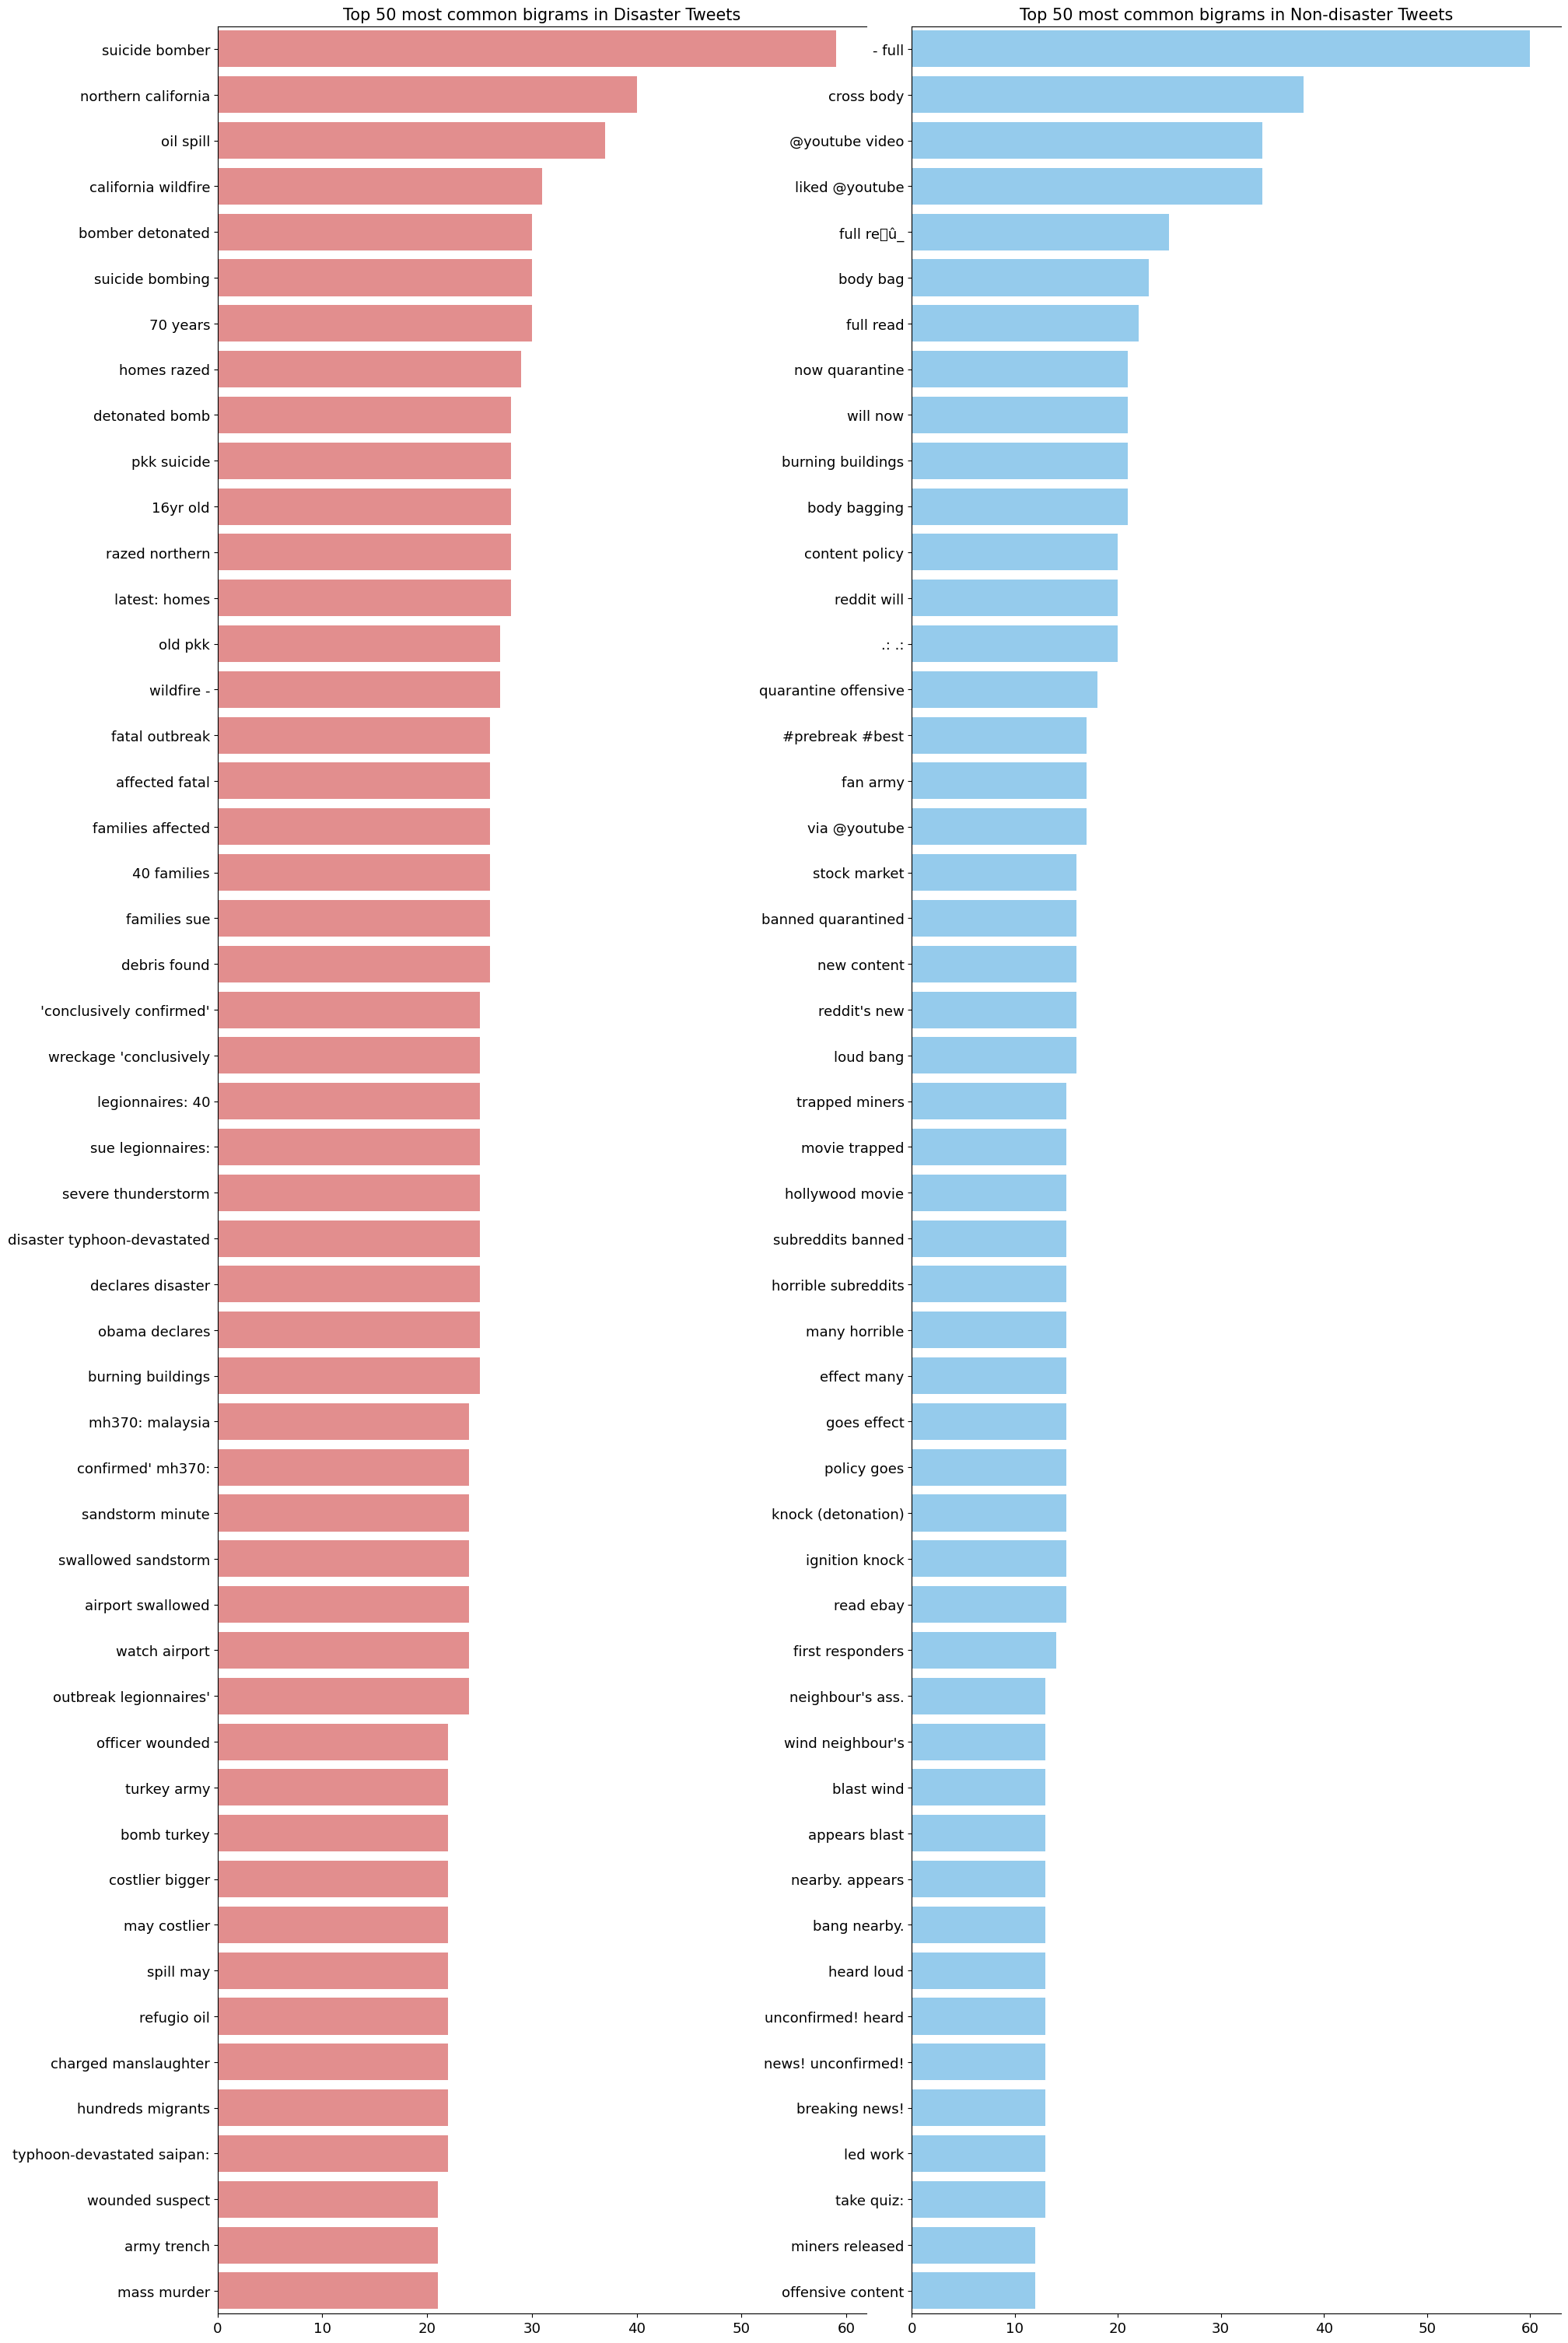

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(18,30), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='lightcoral')
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='lightskyblue')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=15)

plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


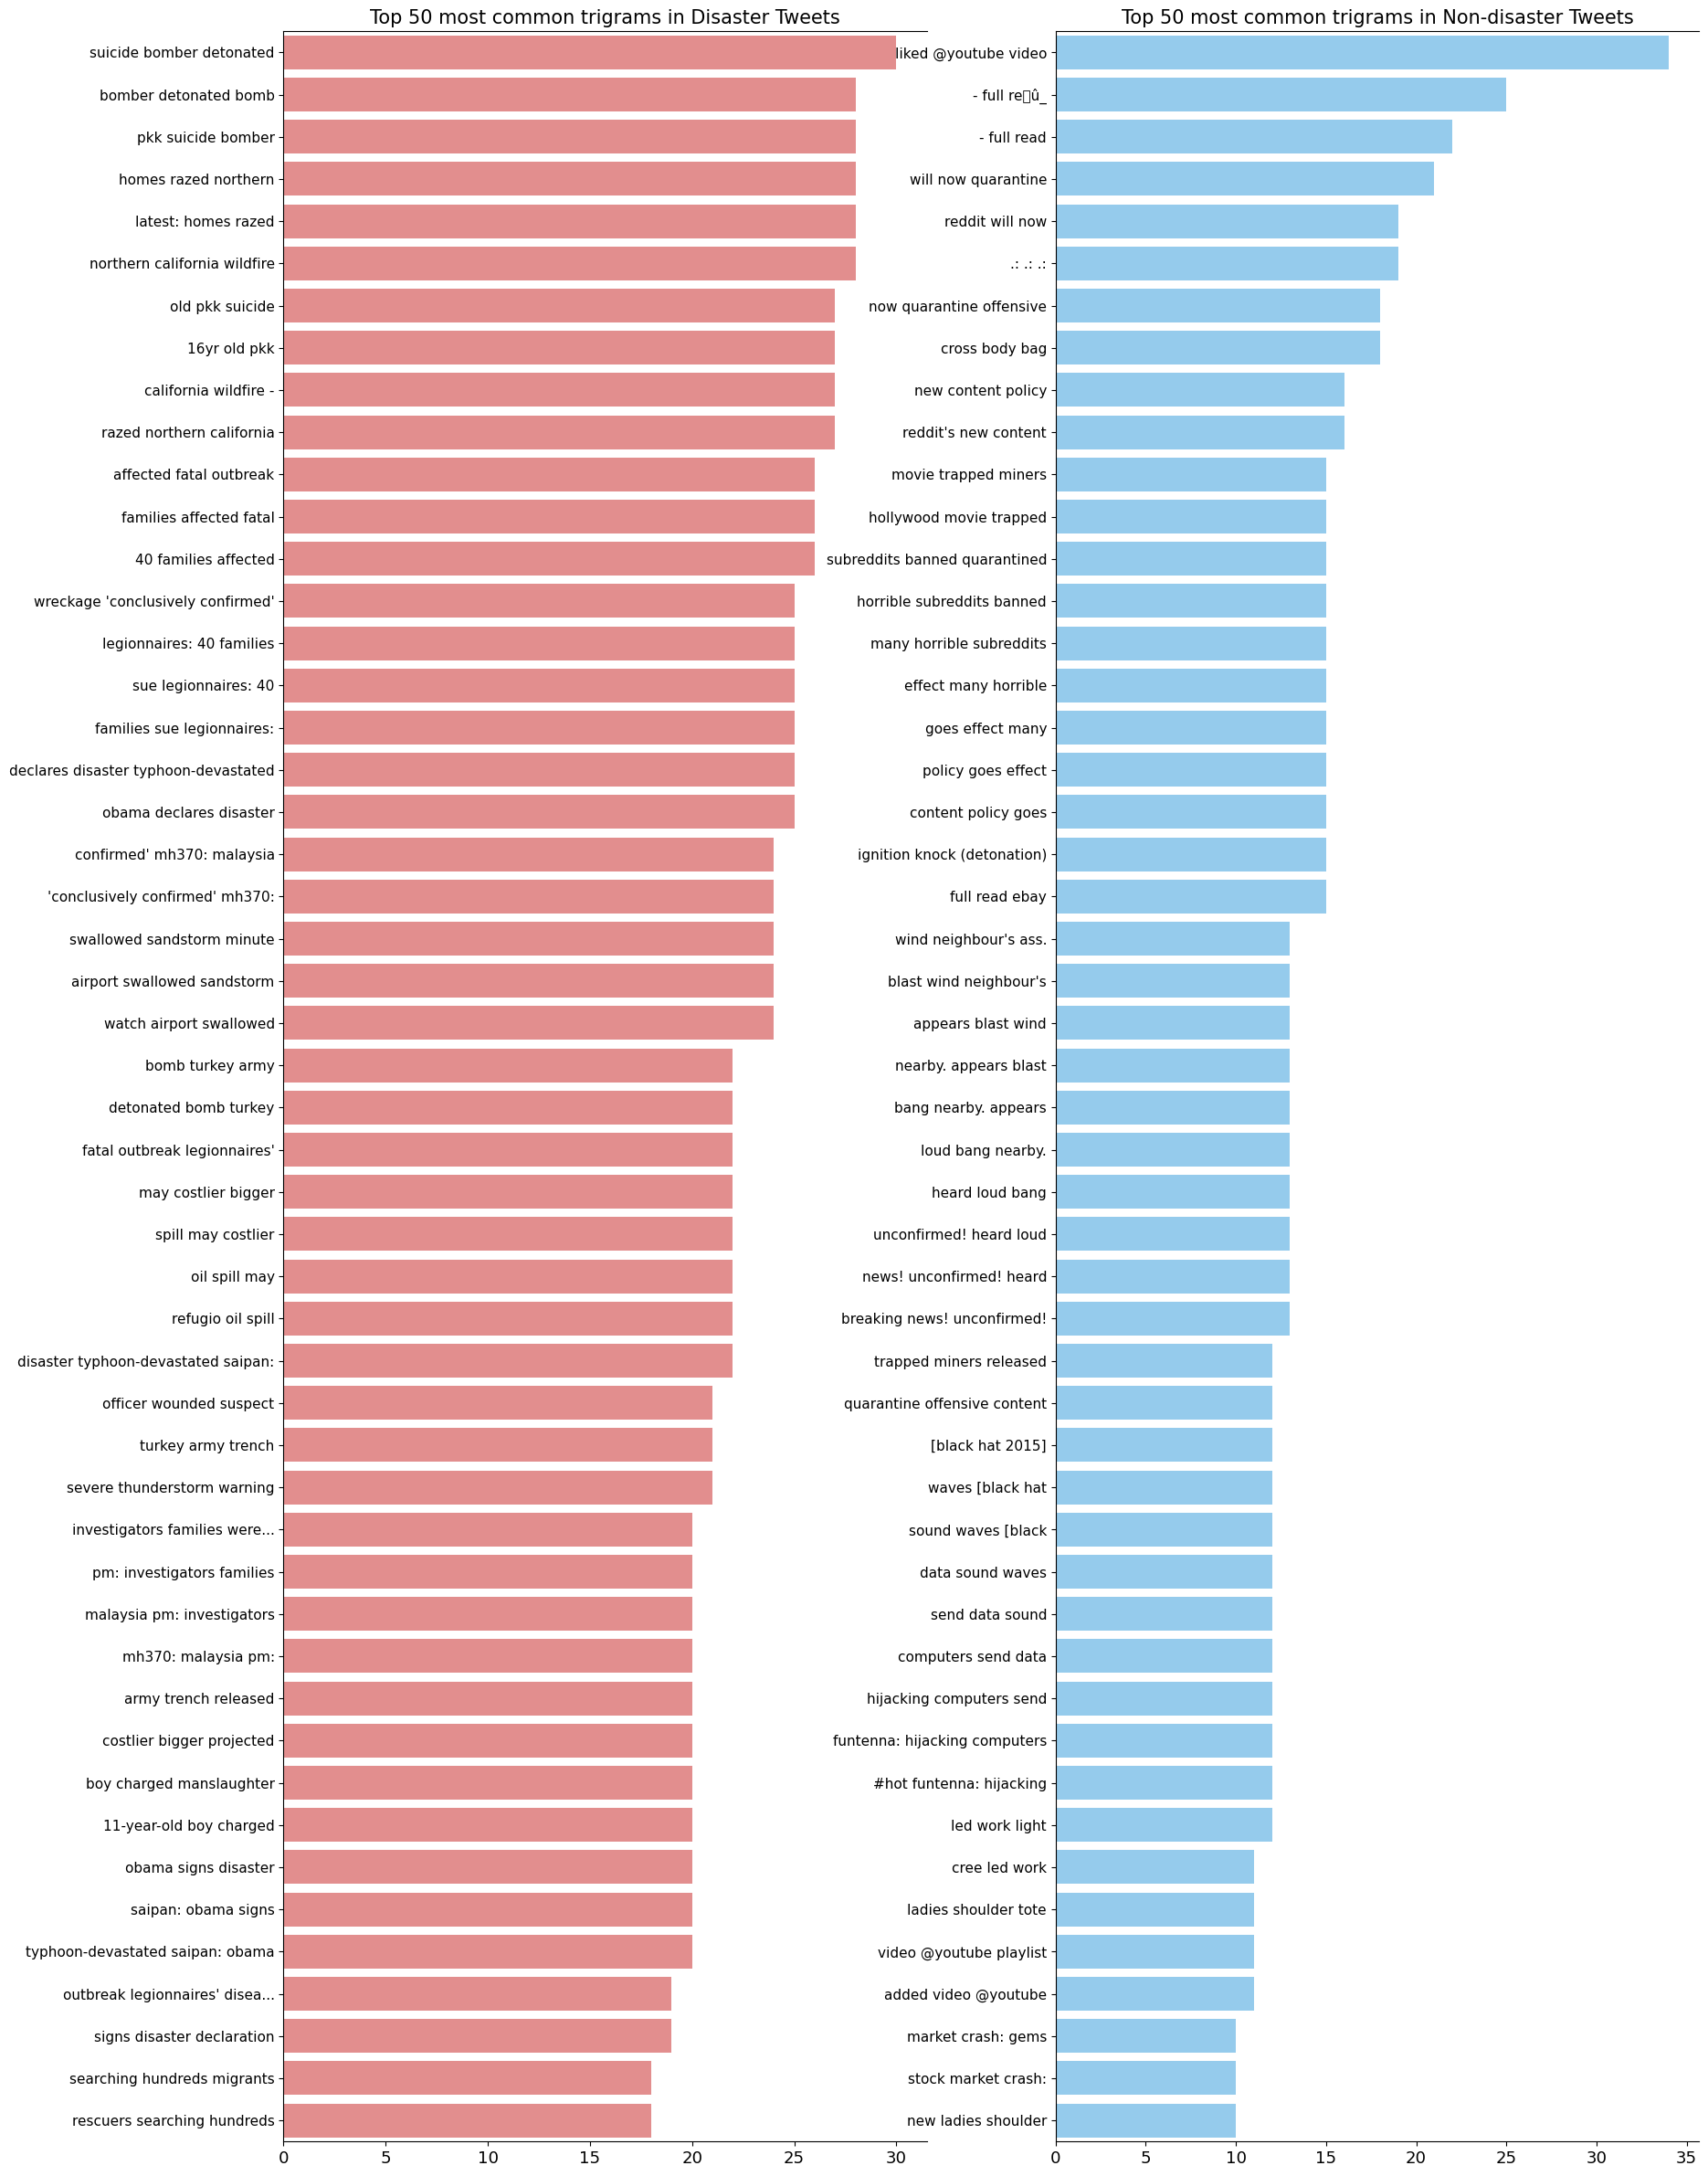

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 30), dpi=100)

sns.barplot(y=df_disaster_trigrams[0].values[:N], x=df_disaster_trigrams[1].values[:N], ax=axes[0], color='lightcoral')
sns.barplot(y=df_nondisaster_trigrams[0].values[:N], x=df_nondisaster_trigrams[1].values[:N], ax=axes[1], color='lightskyblue')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=11)

axes[0].set_title(f'Top {N} most common trigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Non-disaster Tweets', fontsize=15)

plt.show()

In [11]:
df_mislabeled = train.groupby(['text']).nunique().sort_values(by='target', ascending=False)
df_mislabeled = df_mislabeled[df_mislabeled['target'] > 1]['target']
df_mislabeled.index.tolist()

['like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit',
 'Hellfire! We don\x89Ûªt even want to think about it or mention it so let\x89Ûªs not do anything that leads to it #islam!',
 "The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'",
 'In #islam saving a person is equal in reward to saving all humans! Islam is the opposite of terrorism!',
 'To fight bioterrorism sir.',
 'Who is bringing the tornadoes and floods. Who is bringing the climate change. God is after America He is plaguing her\n \n#FARRAKHAN #QUOTE',
 '#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption',
 '#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect',
 'He came to a land which was engulfed in tribal war and turned it into a land 

## Data Cleaning

In [12]:
#drop the id column since it does not contain any valuable information
train=train.drop(['id','keyword','location'],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_20080\3917792941.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train=train.drop(['id','keyword','location'],1)


In [13]:
train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [14]:
len(train)

7613

In [15]:
from nltk import FreqDist
import nltk

train.reset_index(drop=True)
#tokenizes the sentences and convert it to the lowercase and add those values to the list corpus
corpus=[]
for i in range(0,(len(train)-1)):
    sentence= train['text'][i]
    tokens = nltk.wordpunct_tokenize(sentence)
    words = [w.lower() for w in tokens]
    corpus.append(words)

In [16]:
#create a list from above list of lists
from pandas.core.common import flatten
wc=list(flatten(corpus))
wc[:10]

['our',
 'deeds',
 'are',
 'the',
 'reason',
 'of',
 'this',
 '#',
 'earthquake',
 'may']

In [17]:
dist = FreqDist(wc)
wordtotal=0
for word in dist.keys():
    wordtotal=wordtotal+ dist[word]

print("total words with punctuations:",wordtotal)
print("total unique words           :",len(dist))

total words with punctuations: 167204
total unique words           : 21999


In [18]:
#removing puntuation marks. taking only the words.
import re
def alphaFreqDist (words):
    adist =FreqDist()
    pattern = re.compile('.*[^a-z].*')
    for word in words:
        if not pattern.match(word):
            adist[word] += 1
    return adist

adist= alphaFreqDist(wc)
wordtot=0
for word in adist.keys():
    wordtot=wordtot+ adist[word]

print("total words without punctuations:",wordtot)
print("total unique words              :",len(adist))

total words without punctuations: 121064
total unique words              : 16160


In [19]:
#removing stopwords from the corpus
from nltk.corpus import stopwords
nltk.download('stopwords')
without_stopwords_wc = [t for t in wc if not t in stopwords.words("english")]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
def withoutStopwordsDist (words):
    wdist =FreqDist()
    pattern = re.compile('.*[^a-z].*')
    for word in words:
        if not pattern.match(word):
            wdist[word] += 1
    return wdist

wdist= withoutStopwordsDist(without_stopwords_wc)
without_sw=list(wdist.keys())
wordtotws=0
for word in wdist.keys():
    wordtotws=wordtotws+ wdist[word]

print("total words without stopwords   :",wordtotws)
print("total unique words              :",len(wdist))

total words without stopwords   : 77749
total unique words              : 16013


In [21]:
#lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
lemmawords=[]
for w in range(1,len(without_stopwords_wc)):
    lemmaword= lemmatizer.lemmatize(without_stopwords_wc[w-1])
    lemmawords.append(lemmaword)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
def lemmaDist (words):
    ldist =FreqDist()
    pattern = re.compile('.*[^a-z].*')
    for word in words:
        if not pattern.match(word):
            ldist[word] += 1
    return ldist
ldist= lemmaDist(lemmawords)
wordtotle=0
for word in ldist.keys():
    wordtotle=wordtotle+ ldist[word]

print("total words lemmatized:",wordtotle)
print("total unique words    :",len(ldist))

total words lemmatized: 77749
total unique words    : 14791


In [23]:
#adding words count to the dataset. this can be used as feture to increase model accuracy later
train['wordscount'] = train['text'].apply(lambda x:len(str(x).split())) 
train['text']= [w.lower() for w in train['text']]
train.head()

,text,target,wordscount
0,our deeds are the reason of this #earthquake m...,1,13
1,forest fire near la ronge sask. canada,1,7
2,all residents asked to 'shelter in place' are ...,1,22
3,"13,000 people receive #wildfires evacuation or...",1,8
4,just got sent this photo from ruby #alaska as ...,1,16


In [24]:
print('maximum number of words in a sentence :',max(train['wordscount']))
print('minimum number of words in a sentence :',min(train['wordscount']))

maximum number of words in a sentence : 31
minimum number of words in a sentence : 1


In [25]:
#this function removes stopwords from the reviews
import string
def stopwordremover(review):
    stop_words = stopwords.words('english')
    review = review.split()
    review = " ".join([word for word in review if not word in stop_words])
    review = review.translate(str.maketrans('', '', string.punctuation))
    return review

In [26]:
#use apply function to remove stopwords from the dataframe column
train['text']= train['text'].apply(stopwordremover)
#after removing stop words then count the number of words in the review.
train['text']= [w.lower() for w in train['text']]
train['wordscount1'] = train['text'].apply(lambda x:len(str(x).split())) 
train.head()

,text,target,wordscount,wordscount1
0,deeds reason earthquake may allah forgive us,1,13,7
1,forest fire near la ronge sask canada,1,7,7
2,residents asked shelter place notified officer...,1,22,11
3,13000 people receive wildfires evacuation orde...,1,8,7
4,got sent photo ruby alaska smoke wildfires pou...,1,16,9


In [27]:
print('maximum number of words in a sentence :',max(train['wordscount1']))
print('minimum number of words in a sentence :',min(train['wordscount1']))

maximum number of words in a sentence : 25
minimum number of words in a sentence : 1


In [28]:
#first try to model those data only using words in the reviews. so to do that we can use vectorizor and tfidf vectorizor functions.
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train['text'])

In [30]:
y=train['target']

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
#libraries for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [32]:
from sklearn.model_selection import train_test_split

#divide the dataset into train set and test set 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [33]:
print(x_train.shape)
print(x_test.shape)

(6090, 22370)
(1523, 22370)


train accuracy: 0.997208538587849 
 test accuracy: 0.788575180564675


classification report for extra tree classifier
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       841
           1       0.82      0.67      0.74       682

    accuracy                           0.79      1523
   macro avg       0.80      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



confusion matrix for extra tree classifier


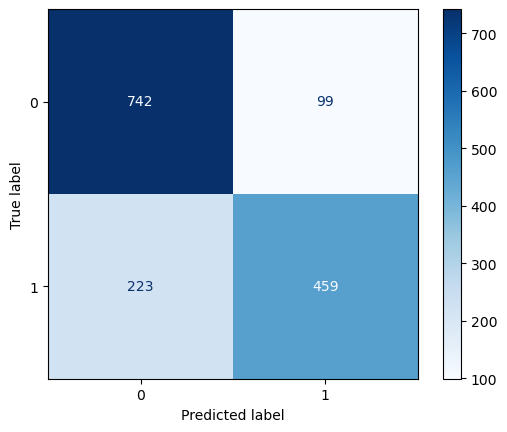

In [34]:
# extra tree classifier
extree = ExtraTreesClassifier()
model8=extree.fit(x_train, y_train)
print("train accuracy:",model8.score(x_train, y_train),"\n","test accuracy:",model8.score(x_test,y_test))

extpred = extree.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(y_test,extpred))
print("\n")
print("confusion matrix for extra tree classifier")
ConfusionMatrixDisplay.from_estimator(extree, x_test, y_test,cmap="Blues")

In [35]:
import numpy as np
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

In [36]:
#calculate Matthews correlation coefficient
matthews_corrcoef(y_test,extpred)

0.5731124709996891

In [37]:
roc = roc_auc_score(y_test,extpred)
print('ROC: %.3f' % roc)

ROC: 0.778


In [38]:
actual_values = y_test.tolist()

In [39]:
input_data = x_test
predicted_values = extree.predict(input_data)

In [40]:
df = pd.DataFrame(columns=['Actual', 'Predicted'])
for actual, predicted in zip(actual_values, predicted_values):
    df = df.append({'Actual': actual, 'Predicted': predicted}, ignore_index=True)
print(df)

C:\Users\Dell\AppData\Local\Temp\ipykernel_20080\2478160553.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Actual': actual, 'Predicted': predicted}, ignore_index=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20080\2478160553.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Actual': actual, 'Predicted': predicted}, ignore_index=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20080\2478160553.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Actual': actual, 'Predicted': predicted}, ignore_index=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20080\2478160553.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

     Actual Predicted
0         0         0
1         0         0
2         1         1
3         0         0
4         1         1
...     ...       ...
1518      0         0
1519      1         1
1520      0         0
1521      1         1
1522      0         0

[1523 rows x 2 columns]


C:\Users\Dell\AppData\Local\Temp\ipykernel_20080\2478160553.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Actual': actual, 'Predicted': predicted}, ignore_index=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20080\2478160553.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Actual': actual, 'Predicted': predicted}, ignore_index=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20080\2478160553.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Actual': actual, 'Predicted': predicted}, ignore_index=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20080\2478160553.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

In [41]:
df.to_excel("D:\\ETC Results.xlsx", index=False)